In [8]:
!git clone https://github.com/khaled2792000/medical_image_processing_using_deep_learning.git

Cloning into 'medical_image_processing_using_deep_learning'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 263.55 KiB | 26.36 MiB/s, done.


In [9]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth

In [10]:
import matplotlib.pyplot as plt
flowers_image = cv2.imread('/content/medical_image_processing_using_deep_learning/EX1/assists/flowers.jpg')
medical_image = cv2.imread('/content/medical_image_processing_using_deep_learning/EX1/assists/lung_canc1.png', cv2.IMREAD_GRAYSCALE)


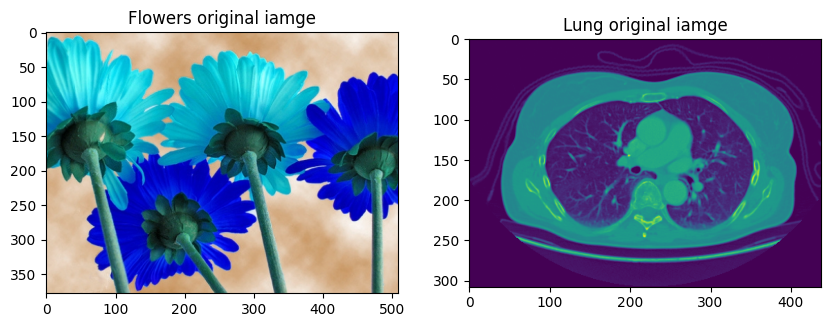

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(flowers_image), plt.title('Flowers original iamge')
plt.subplot(122), plt.imshow(medical_image), plt.title('Lung original iamge')
plt.show()

In [ ]:
def kmeans_segmentation(image, n_clusters=3):
    # Reshape the image to be one vector
    X = image.reshape(-1, image.shape[2] if len(image.shape) == 3 else 1)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X)
    segmented_img = kmeans.labels_.reshape(image.shape[:2])
    return segmented_img

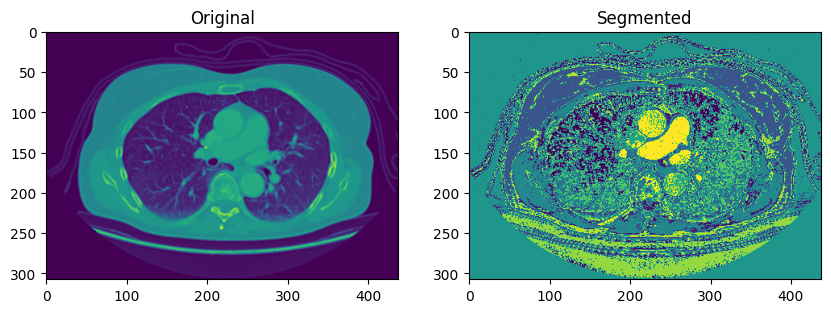

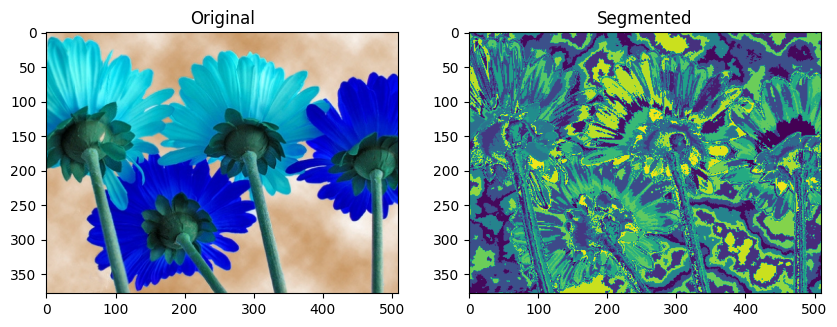

In [ ]:
n_clusters_medical = 20
medical_kmeans_segmented = kmeans_segmentation(medical_image, n_clusters=n_clusters_medical)

plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(medical_image), plt.title('Original')
plt.subplot(122), plt.imshow(medical_kmeans_segmented, cmap='viridis'), plt.title('Segmented')
plt.show()


n_clusters_flowers = 50
flowers_kmeans_segmented = kmeans_segmentation(flowers_image, n_clusters=n_clusters_flowers)

plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(flowers_image), plt.title('Original')
plt.subplot(122), plt.imshow(flowers_kmeans_segmented, cmap='viridis'), plt.title('Segmented')
plt.show()


In [ ]:
def meanshift_segmentation(image):
    image_reshaped = image.reshape(-1, image.shape[2] if len(image.shape) == 3 else 1)
    bandwidth = estimate_bandwidth(image_reshaped, quantile=0.2, n_samples=500)
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(image_reshaped)
    segmented_img = meanshift.labels_.reshape(image.shape[:2])  # Use labels directly
    return segmented_img

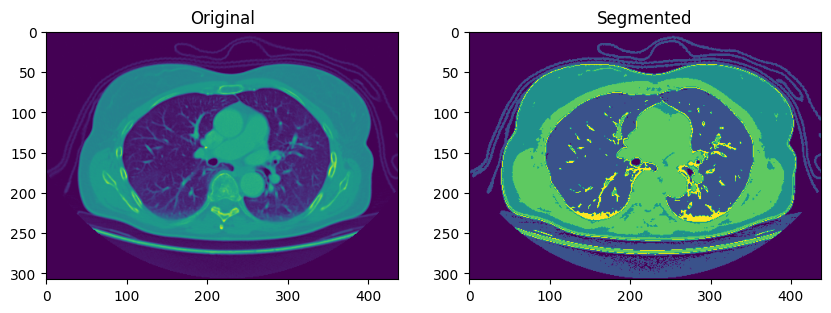

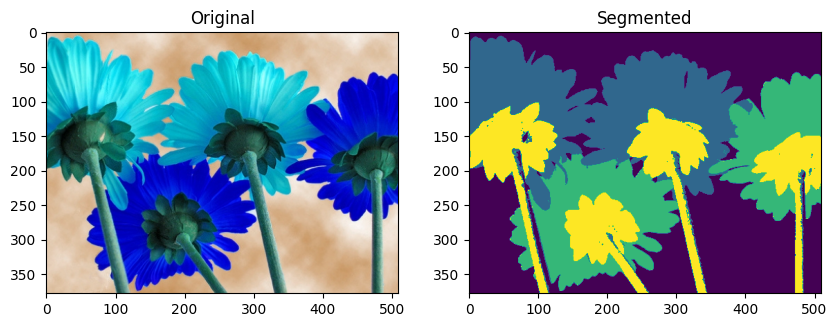

In [ ]:
medical_meanshift_segmented = meanshift_segmentation(medical_image)

plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(medical_image), plt.title('Original')
plt.subplot(122), plt.imshow(medical_meanshift_segmented, cmap='viridis'), plt.title('Segmented')
plt.show()


flowers_meanshift_segmented = meanshift_segmentation(flowers_image)

plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(flowers_image), plt.title('Original')
plt.subplot(122), plt.imshow(flowers_meanshift_segmented, cmap='viridis'), plt.title('Segmented')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
def evaluate_segmentation(image, labels):
    # Ensure that the image and labels have the same spatial dimensions
    if image.shape[:2] != labels.shape:
        raise ValueError(f"The spatial dimensions of the image ({image.shape[:2]}) and labels ({labels.shape}) must match")

    # Calculate silhouette score
    score = silhouette_score(image.reshape(-1, image.shape[2] if len(image.shape) == 3 else 1), labels.ravel())
    return score

In [ ]:
# Evaluate k-means
medical_kmeans_score = evaluate_segmentation(medical_image, medical_kmeans_segmented)
flowers_kmeans_score = evaluate_segmentation(flowers_image, flowers_kmeans_segmented)

# Evaluate mean-shift
medical_meanshift_score = evaluate_segmentation(medical_image, medical_meanshift_segmented)
flowers_meanshift_score = evaluate_segmentation(flowers_image, flowers_meanshift_segmented)

print(f'Medical Image K-Means Silhouette Score: {medical_kmeans_score}')
print(f'Medical Image Mean-Shift Silhouette Score: {medical_meanshift_score}')
print(f'Flowers Image K-Means Silhouette Score: {flowers_kmeans_score}')
print(f'Flowers Image Mean-Shift Silhouette Score: {flowers_meanshift_score}')

Medical Image K-Means Silhouette Score: 0.6760399179121676
Medical Image Mean-Shift Silhouette Score: 0.6355747576108693
Flowers Image K-Means Silhouette Score: 0.38002597445225483
Flowers Image Mean-Shift Silhouette Score: 0.6864906889481825
